In [125]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# 2016 Precincts: https://github.com/mggg-states/GA-shapefiles
pct_path = "./GA2016-pcts/GA_precincts16.shp"
# 2010 BG: https://www.nhgis.org/
bg_path = "./GA2010-bg/GA_blck_grp_2010.shp"
bg_csv_path = "./GA2010-bg/nhgis0004_ds176_20105_2010_blck_grp.csv"

pct_df = gpd.read_file(pct_path) # init: epsg4019
bg_df = gpd.read_file(bg_path)   # init: aea 
bg_csv = pd.read_csv(bg_csv_path)


DriverError: ./GA2016-pcts/GA_precincts16.shp: No such file or directory

In [ ]:
# CALCULATING AREA AFTER CORRECT PROJECTION

pct_df = pct_df.to_crs({'init': 'epsg:32617'}) # UTM zone 17N
pct_df["area"] = pct_df["geometry"].area / 10**6 # km^2 unit


bg_df = bg_df.to_crs({'init': 'epsg:32617'})
filtered = bg_csv[['GISJOIN', 'JMAE001']]
bg_df = bg_df.merge(filtered, on='GISJOIN')
bg_df.rename(columns={'JMAE001':'POPULATION'}, inplace=True)
bg_df["area"] = bg_df["geometry"].area / 10**6 # km^2 unit

In [126]:
pct_tpop = pct_df["POPULATION"]
pct_area = pct_df["area"]

pct_df.head()

,ID,POPULATION,DISTRICT,PRECINCT_I,PRECINCT_N,CTYNAME,FIPS1,FIPS2,PRES16D,PRES16R,...,AMINVAP,ASIANVAP,NHPIVAP,OTHERVAP,2MOREVAP,CONDIST,HDIST,SENDIST,geometry,area
0,6094217,1013,073131,131,JOURNEY COMM. CHURCH,Columbia,13073,073,107,459,...,3,5,0,0,7,012,122,024,"POLYGON ((393696.7447464248 3716014.68485113, ...",4.824343
1,6094266,3858,073064,064,GRACE BAPTIST CHURCH,Columbia,13073,073,767,1334,...,5,120,5,3,32,010,122,024,"POLYGON ((392024.3422939497 3715555.042037216,...",4.235029
2,6094297,1920,073061,061,GREENBRIER HIGH,Columbia,13073,073,387,1393,...,3,31,0,1,9,010,122,024,"POLYGON ((391791.3557067647 3714532.563821182,...",14.487771
3,6094341,1770,073063,063,RIVERSIDE ELEMENTARY,Columbia,13073,073,267,624,...,2,28,0,3,15,012,122,024,"POLYGON ((394285.0243884961 3715718.102746466,...",2.257523
4,6094377,3131,073132,132,WESLEY METHODIST,Columbia,13073,073,452,1377,...,10,109,3,1,21,012,122,024,"POLYGON ((393891.0203102889 3715451.53304419, ...",9.790979


In [123]:
bg_tpop = bg_df["POPULATION"]
bg_area = bg_df["area"]

bg_df.head()


,STATEFP10,COUNTYFP10,TRACTCE10,BLKGRPCE10,GEOID10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,GISJOIN,Shape_area,Shape_len,geometry,POPULATION,area
0,13,121,006100,3,131210061003,Block Group 3,G5030,S,601670,0,+33.7249915,-084.4431379,G13012100061003,6.016706e+05,3284.722133,"POLYGON ((181467.0082717985 3737204.259470967,...",1661,0.602700
1,13,121,006000,4,131210060004,Block Group 4,G5030,S,380682,0,+33.7352256,-084.4323360,G13012100060004,3.806821e+05,3231.872092,"POLYGON ((182711.4987602795 3737741.075165247,...",1132,0.381327
2,13,121,006100,1,131210061001,Block Group 1,G5030,S,294761,0,+33.7320135,-084.4315327,G13012100061001,2.947587e+05,2723.459339,"POLYGON ((182665.890610408 3737681.167806551, ...",442,0.295258
3,13,121,010516,2,131210105162,Block Group 2,G5030,S,4153306,14126,+33.5711359,-084.4651600,G13012100105162,4.167432e+06,10566.687623,"POLYGON ((178987.6584650229 3721668.333915267,...",3237,4.174751
4,13,121,011412,3,131210114123,Block Group 3,G5030,S,4049402,38487,+34.0284738,-084.3114059,G13012100114123,4.087890e+06,10907.186258,"POLYGON ((196748.0983592065 3771604.693427653,...",2750,4.094002


In [113]:
bg_mean = bg_df['area'].mean()
bg_std = np.std(bg_df['area'])

bg_sm_area =bg_df[bg_df['area']<bg_mean]
#bg_med_area = bg_df[bg_df['area']>=2 or bg_df['area']< bg_mean]
bg_big_area = bg_df[bg_df['area']>=bg_mean]
zero_bg =bg_df[bg_df['area']==0]
len(zero_bg) # result 0
#print("< 2 :", len(small_bg_area), "and >= 2:", len(big_bg_area))

0

In [114]:
pct_mean = pct_df['area'].mean()

pct_sm_area = pct_df[pct_df['area']<pct_mean]
pct_big_area = pct_df[pct_df['area']>=pct_mean]
zero_pct =pct_df[pct_df['area']==0]
len(zero_pct)  # result 0

len(pct_df)


2664

In [108]:
small['area'].mean()

0.6391325833169218

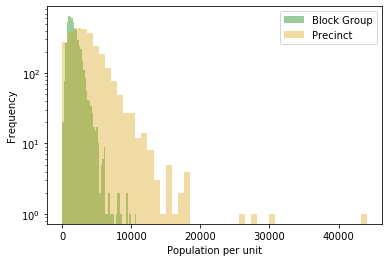

In [121]:
colors = ['green', 'goldenrod']
labels= ['Block Group', 'Precinct']
plt.figure()

plt_1 = sns.distplot(bg_tpop,kde=False, color=colors[0],label=labels[0])
plt_2 = sns.distplot(pct_tpop, kde=False, color=colors[1],label=labels[1])
plt_1.set_yscale('log')
plt_2.set_yscale('log')


plt.legend()
plt.ylabel("Frequency")
plt.xlabel("Population per unit")
plt.show()



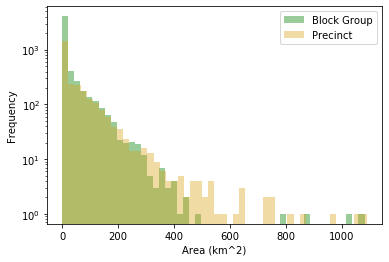

In [124]:
plt.figure()
plt_1 = sns.distplot(bg_area,kde=False, color=colors[0],label=labels[0])
plt_2 = sns.distplot(pct_area, kde=False, color=colors[1],label=labels[1])
plt_1.set_yscale('log')
plt_2.set_yscale('log')
plt.legend()
plt.ylabel("Frequency")
plt.xlabel("Area (km^2)")
plt.show()
